Importing all the Libraries

In [7]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

Reading a File(Part1_Crime_data.csv)





In [13]:

crime_df = pd.read_csv("/content/sample_data/Part1_Crime_data.csv")
crime_df.shape

(434544, 16)

Splitting the crimedatetime column into year, month,day,hour.

In [14]:

crime_df['CrimeDateTime'] = crime_df['CrimeDateTime'].astype('datetime64[ns]')
# formatting Crime_year using CrimeDateTime and converting into year
crime_df['Crime_Year']=crime_df.CrimeDateTime.dt.year
# formatting Crime_Month from CrimeDateTime and converting into month
crime_df['Crime_Month']=crime_df.CrimeDateTime.dt.month
# formatting Crime_Day from CrimeDateTime and converting into day
crime_df['Crime_Day']=crime_df.CrimeDateTime.dt.day
# formatting Crime_Hour from CrimeDateTime and converting into hour
crime_df['Crime_Hour']=crime_df.CrimeDateTime.dt.hour

Replacing types of ROBBERY with ROBBERY 

In [15]:
# replacing all Robbery in few places as Robbery
temp = "ROBBERY"
crime_df.replace("ROBBERY - STREET", temp, inplace=True)
crime_df.replace("ROBBERY - COMMERCIAL", temp, inplace=True)
crime_df.replace("ROBBERY - RESIDENCE", temp, inplace=True)
crime_df.replace("ROBBERY - CARJACKING", temp, inplace=True)


Replacing types of ASSAULT with ASSAULT

In [16]:
# Replacing all types of assault with assault
temp_ass = "ASSAULT"
crime_df.replace("COMMON ASSAULT", temp_ass, inplace=True)
crime_df.replace("AGG. ASSAULT", temp_ass, inplace=True)

Replacing types of LARCENY with LARCENY

In [17]:
# replacing larceny from auto as larceny
temp_lar = "LARCENY"
crime_df.replace("LARCENY FROM AUTO", temp_lar, inplace=True)

EDA- Crime Types by Hour of Day in Maryland

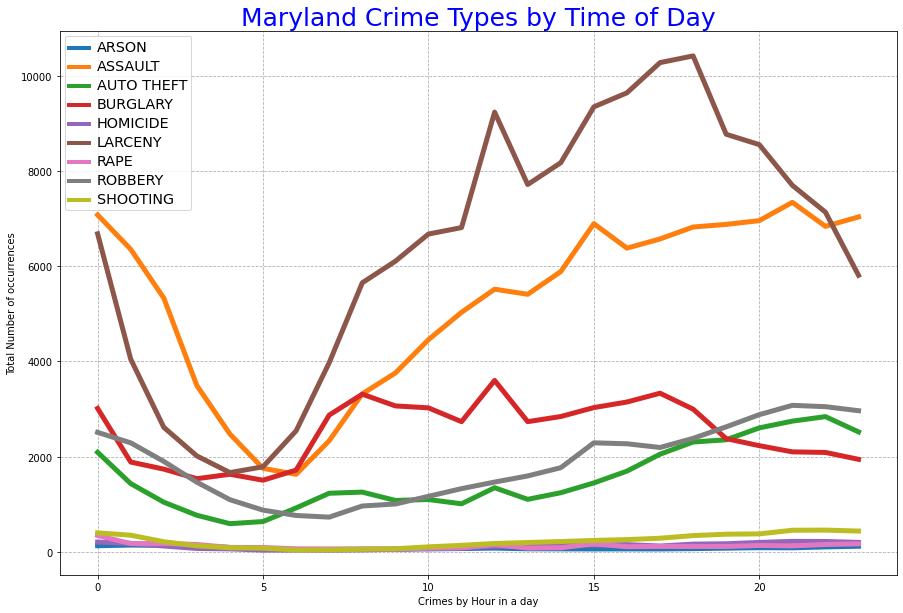

In [18]:
crime_hour_group = crime_df.groupby(['Crime_Hour','Description'],as_index=False).agg({'Total_Incidents':'sum'})
fig, axs = plt.subplots(figsize=(15,10))
crime_hour_group.groupby('Description').plot(x="Crime_Hour", y="Total_Incidents", ax=axs,linewidth=5)
axs.set_title('Maryland Crime Types by Time of Day',color = 'blue',fontsize=25)
axs.set_ylabel('Total Number of occurrences')
axs.set_xlabel('Crimes by Hour in a day')
axs.grid(linestyle='--')
legend = plt.legend([v[0] for v in crime_hour_group.groupby('Description')['Description']])
leg_lines, leg_texts = legend.get_lines(), legend.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')
plt.show()

EDA - Major crimes in Maryland

Description
ARSON           1886
ASSAULT       125576
AUTO THEFT     37378
BURGLARY       60439
HOMICIDE        2925
LARCENY       153403
RAPE            2883
ROBBERY        44618
SHOOTING        5436
dtype: int64


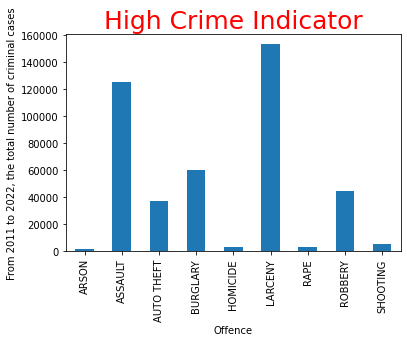

In [19]:
high_crime_indicator = crime_df.groupby('Description').size()
print(high_crime_indicator)
high_crime_indicator
axs = high_crime_indicator.plot.bar()
axs.set_xlabel('Offence')
axs.set_ylabel('From 2011 to 2022, the total number of criminal cases')
axs.set_title('High Crime Indicator',color = 'red',fontsize=25)
plt.show()

EDA - Total criminal cases from 2011 to 2022

Crime_Year
2012    18031
2013    48328
2014    45225
2015    48069
2016    48668
2017    52289
2018    48593
2019    46591
2020    36271
2021    36710
2022     5769
dtype: int64


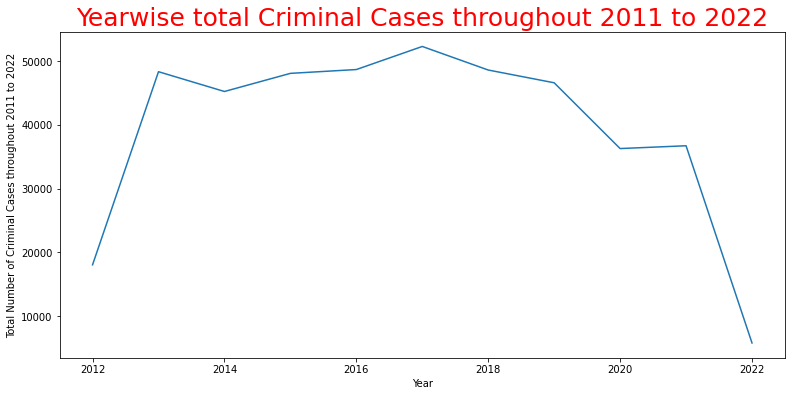

In [20]:
crime_df2 = crime_df[crime_df['Crime_Year'] > 2010]
total_crime_yearwise = crime_df2.groupby('Crime_Year').size()
print(total_crime_yearwise)
year = crime_df[crime_df['Crime_Year'] > 2010]


plt.figure(figsize=(13,6))

axis = total_crime_yearwise.plot.line()
axis.set_xlabel('Year')
axis.set_ylabel('Total Number of Criminal Cases throughout 2011 to 2022')
axis.set_title('Yearwise total Criminal Cases throughout 2011 to 2022',color = 'red',fontsize=25)
plt.show()

Replacing LARCENY,AUTO THEFT,BURGLARY with 0(LOW-Severity)


In [21]:
temp = "0"
crime_df.replace("BURGLARY", temp, inplace=True)
crime_df.replace("AUTO THEFT", temp, inplace=True)
crime_df.replace("LARCENY", temp, inplace=True)

Replacing ROBBERY,ASSAULT with 1(Medium-Severity)


In [22]:
temp = "1"
crime_df.replace("ASSAULT", temp, inplace=True)
crime_df.replace("ROBBERY", temp, inplace=True)

Replacing SHOOTING,RAPE,ARSON,HOMICIDE with 2(HIGH-SEVERITY)


In [23]:
temp = "2"
crime_df.replace("ARSON", temp, inplace=True)
crime_df.replace("HOMICIDE", temp, inplace=True)
crime_df.replace("SHOOTING", temp, inplace=True)
crime_df.replace("RAPE", temp, inplace=True)
crime_df = crime_df.rename(columns={'Description': 'Level', 'Crime_Month': 'Season'})

EDA-District Wise Crime Count

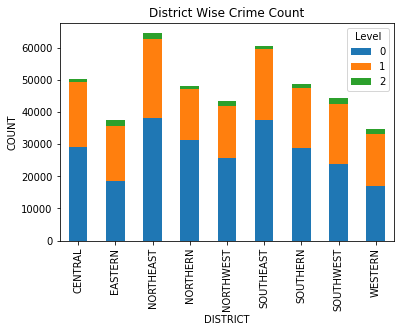

In [24]:

crime_df.groupby(['District','Level'])['Level'].count().unstack('Level').plot(kind='bar',stacked=True)
plt.title("District Wise Crime Count")
plt.ylabel("COUNT")
plt.xlabel("DISTRICT")
plt.show()